# Divertor spectrcopy (density only)

Due to its versatility, the lines of sight for divertor spectroscopy can change from shot to shot. One should double-check diaggeom for the locations. There are also several shotfiles associated with divertor density, `EVL`, `FVL`, `GVL` and `HVL`.

In [2]:
import sys
sys.path.append('ipfnlite/')
sys.path.append('/afs/ipp/aug/ads-diags/common/python/lib/')
from spec_channels import spec_channels
from getsig import getsig
from get_los_diaggeom import get_los
from getVessel import getVessel
from plotVessel import plotVessel
import matplotlib.pyplot as plt
#plt.style.use('./Styles/darklab.mplstyle')

In [3]:
shotnr = 36595
evl_chans = spec_channels(shotnr)
fvl_chans = spec_channels(shotnr, shotfile='FVL')
gvl_chans = spec_channels(shotnr, shotfile='GVL')

In [4]:
evl_chans

['RTN-03',
 'RTN-05',
 'RXV-08',
 'RTN-01',
 'RIN-03',
 'RIN-05',
 'RXV-02',
 'RXV-04',
 'ROV-14',
 'RIV-06',
 'RIV-09',
 'RIV-11',
 'ROV-09',
 'ZIV-04',
 'ZIV-06',
 'ZIV-08',
 'ZON-01',
 'ZON-03',
 'ZON-05',
 'ROV-11',
 'ROV-10',
 'ROV-12',
 'ROV-13']

As an example, the lines of sight from EVL were saved from diaggeom for this shot as "EVS_36595.coords".

In [5]:
evl_los = get_los('./Files/EVS_36595.coords')
vessel = getVessel(shotnr)

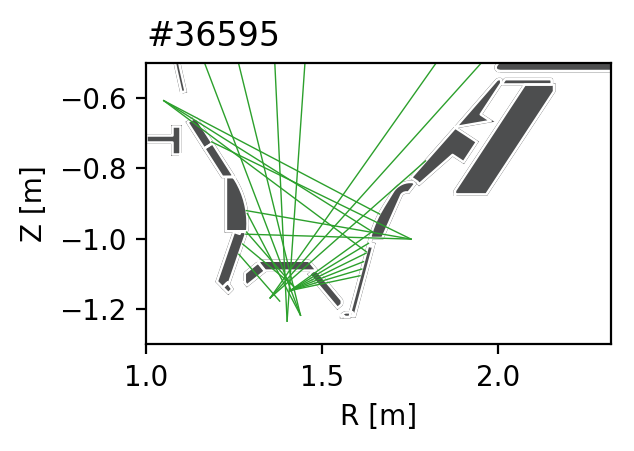

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3), dpi=200)

plotVessel(vessel, ax, color_border='w', color_structure='#4D4E4F', lw_border=0.9)

for chan in evl_chans:
    ax.plot(evl_los['signals'][chan]['0']['R'], evl_los['signals'][chan]['0']['z'], color='C2',lw=0.5)
    
ax.set_aspect('equal')
ax.set_ylabel('Z [m]')
ax.set_xlabel('R [m]')
ax.set_title('#'+str(shotnr), loc='left')
ax.set_xlim(1.0, 2.32)
ax.set_ylim(-1.3, -0.5)
plt.show()

Let's say that after checking diaggeom, you find out you want the following LOS:

In [7]:
wanted_los = ['RXV-04', 'RTN-03', 'ZON-03', 'ZIV-06']

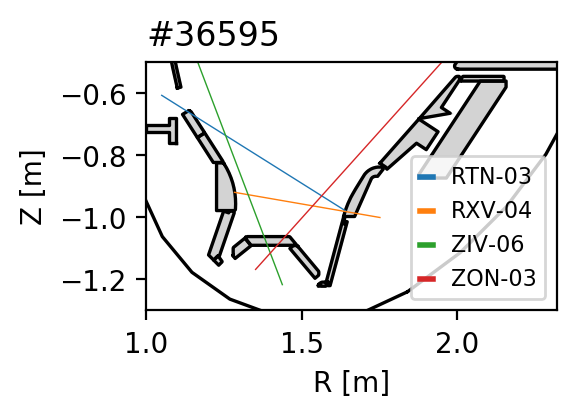

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3), dpi=200)

plotVessel(vessel, ax)#, color_border='w', color_structure='#4D4E4F', lw_border=0.9)

los_index = [i for i, item in enumerate(evl_chans) if item in set(wanted_los)]

for index in los_index:
    ax.plot(evl_los['signals'][evl_chans[index]]['0']['R'], evl_los['signals'][evl_chans[index]]['0']['z'], lw=0.5, label=evl_chans[index])
    
ax.set_aspect('equal')
ax.set_ylabel('Z [m]')
ax.set_xlabel('R [m]')
ax.set_title('#'+str(shotnr), loc='left')
ax.set_xlim(1.0, 2.32)
ax.set_ylim(-1.3, -0.5)

leg = plt.legend(loc='lower right', fontsize=8, handleheight=0.2, handlelength=0.6)
plt.setp(leg.get_lines(), linewidth=2)

plt.tight_layout()
plt.show()

In [9]:
from scipy.signal import medfilt
medpts = 31#Median filter pts
evl = getsig(shotnr, 'EVL', 'Ne')

/afs/ipp/aug/ads-diags/common/python/lib/dd.py:118: RuntimeWarning: Warning by DDcsgrp (8.1): No PARAM_SET found
  warnings.warn(err_txt, RuntimeWarning)


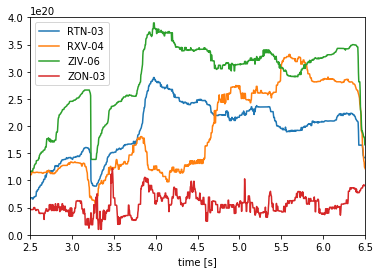

In [10]:
for ind in los_index:
    plt.plot(evl.time, medfilt(evl.data[:,ind], medpts), label=evl_chans[ind])

plt.xlim(2.5, 6.5)
plt.ylim(0, 4e20)
plt.xlabel('time [s]')
plt.legend()
plt.show()